需要安装empiricaldist库，现版本的anaconda自带的有。库的开源地址：https://github.com/AllenDowney/empiricaldist

In [6]:
!pip install empiricaldist

# 1、硬币的结果分布

In [5]:
from empiricaldist import Pmf

In [8]:

coin = Pmf() # 创建一个空的没有赋值的pmf
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


# 2、六面骰子的结果分布

In [7]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


# 3、计算1个字母在词序列中出现的次数

In [14]:
letters = Pmf.from_seq(list('Mississippi'))
letters
letters('i')

0.36363636363636365

In [ ]:
try:
    letters['t']
except KeyError as e:
    print(type(e))
    

# 4、曲奇饼问题：
## （1）简单的两个碗
假设有两碗曲奇饼：<br/>
碗1包含30个香草曲奇饼和10个巧克力曲奇饼；<br/>
碗2包含20个香草曲奇饼和20个巧克力曲奇饼；<br/>
随机挑一个碗拿一块饼干，得到了一块香草曲奇饼，问：从碗1取到香草曲奇饼的概率是多少？

In [18]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2']) # 先验P(A),求P（B|A），P（碗1|香草）
prior
likelihood_vanilla = [0.75, 0.5] # 似然P(A|B) = P(香草|碗1)
posterior = prior * likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [19]:
posterior('Bowl 1')

0.6

## （2）两次取样
如果把取到的香草曲奇饼放回，再随机挑一个碗拿一块饼干，同样是香草曲奇饼。似然，也就是P（香草|碗）是没有变的，但是先验变化。原本的P（碗1）是0.5，通过一次计算后P（碗1）= 0.6

In [22]:
posterior *= likelihood_vanilla #循环，如果重复运行，概率会逐步增加
posterior.normalize()
posterior
posterior('Bowl 1')

0.8350515463917525

上面的循环也体现了贝叶斯的思想，利用先验知识，不断更新关于未知参数的信息，以此获得修订后的参数的可能性，也就是后验概率<br/>
## （3）多碗
假设有101碗曲奇饼：<br/>
碗0包含0%香草曲奇饼；<br/>
碗1包含1%个香草曲奇饼；<br/>
碗2包含2%香草曲奇饼；<br/>
……<br/>
碗100包含100%个香草曲奇饼；<br/>
随机挑一个碗拿一块饼干，得到了一块香草曲奇饼，问：从碗x取到香草曲奇饼的概率是多少？

In [12]:
import numpy as np
hypos = np.arange(101) # 碗 P(A)
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


In [13]:
likelihood_vanilla = hypos / 100 # 似然 P（B|A）
likelihood_vanilla[0:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [14]:
#posterior = prior
#posterior *= likelihood_vanilla #后验
posterior = prior * likelihood_vanilla
posterior.normalize()
posterior(5)

0.00099009900990099

[Text(0.5, 0, 'Bowl #'),
 Text(0, 0.5, 'PMF'),
 Text(0.5, 1.0, 'Posterior after one vanilla cookie')]

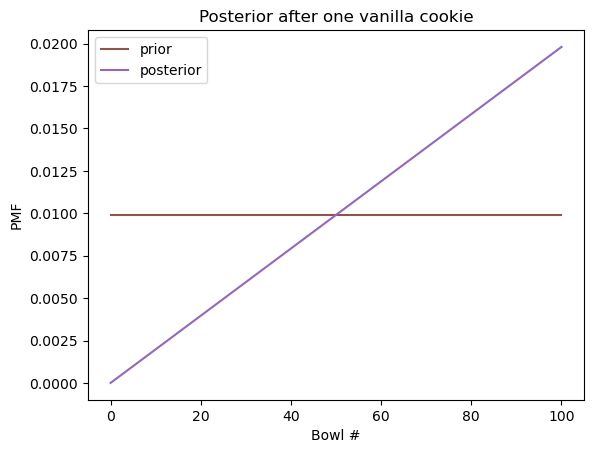

In [24]:
import matplotlib.pyplot as plt
''''''
# ThinkBayes2库下soln文件夹下有utils.py
# decorate也是为了绘图方便封装的
from utils import decorate

def decorate_bowls(title):
    decorate(xlabel = 'Bowl #',
            ylabel = 'PMF',
            title = title)
''''''
prior.plot(label='prior', color='C5')
posterior.plot(label='posterior', color='C4')
# decorate_bowls('Posterior after one vanilla cookie')
ax = plt.gca()

ax.legend()
ax.set(xlabel = 'Bowl #', ylabel = 'PMF', title = 'Posterior after one vanilla cookie')


## （4）多碗多次
想要自定义取几次（每次都放回重取，也就是每个碗的比例是不变的），封装一个类（testCookie.py）

In [32]:
class Cookie(object):
    def __init__(self, bowlNum):
        self.hypos = np.arange(bowlNum)
        self.prior = Pmf(1, self.hypos)
        self.prior.normalize() # 先验
        self.likelihood = self.hypos / (bowlNum - 1)
        self.posterior = self.prior
        
        
    def Updata(self, timeNum):
        timeNums = np.arange(timeNum)
        for time in timeNums:
            self.posterior *= self.likelihood
            self.posterior.normalize()
        return self.posterior

0      0.000000e+00
1      1.041749e-21
2      1.066751e-18
3      6.151424e-17
4      1.092353e-15
           ...     
96     6.925887e-02
97     7.682108e-02
98     8.511848e-02
99     9.421391e-02
100    1.041749e-01
Name: , Length: 101, dtype: float64


[Text(0.5, 0, 'Bowl #'),
 Text(0, 0.5, 'PMF'),
 Text(0.5, 1.0, 'Posterior after one vanilla cookie')]

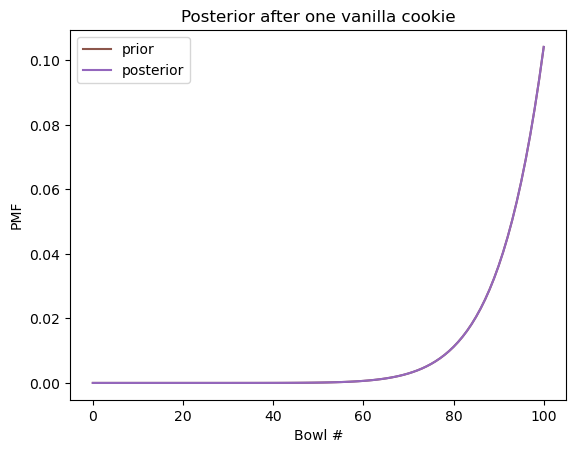

In [33]:
bowlNum = 101
    
pp = Cookie(bowlNum)
like = pp.Updata(10)
    
print(like)
    
pp.prior.plot(label='prior', color='C5')
pp.posterior.plot(label='posterior', color='C4')
ax = plt.gca()
ax.legend()
ax.set(xlabel = 'Bowl #', ylabel = 'PMF', title = 'Posterior after one vanilla cookie')
    

假设取了10次之后，再取一次，得到一块巧克力饼干，更改上面的类。（自己写的，因为不常用python，里面有些代码看着怪怪的，不知道有没有更好的表示方法，建议看Allen.B大佬写的代码）

[Text(0.5, 0, 'Bowl #'), Text(0, 0.5, 'PMF'), Text(0.5, 1.0, 'Posterior')]

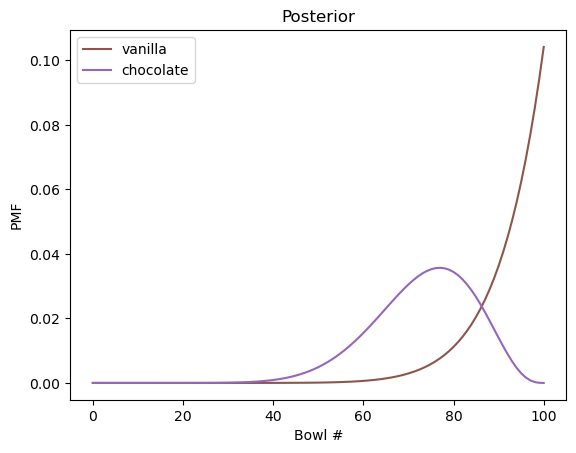

In [34]:
from empiricaldist import Pmf
import numpy as np
import matplotlib.pyplot as plt

class Cookie(object):
    
    def __init__(self, data, kinds):
        self.bowlsNum = data.shape[0]
        self.kindsNum = data.shape[1]
        self.kinds = kinds # 种类
        hypos = np.arange(bowlsNum)
        
        # 先验，P（碗），每个碗的概率是相同的
        self.prior = Pmf(1, hypos)
        self.prior.normalize()
   
        # 似然P（香草|碗）
        self.likelihood = data
        self.posterior = self.prior
        
        
    def Updata(self, timeNum, kind):
        index = self.kinds.index(kind)
        for time in range(timeNum):
            self.posterior *= self.likelihood[..., index]
            self.posterior.normalize()
            
        return self.posterior

bowlsNum = 101
kinds = ['vanilla', 'chocolate']
kindsNum = len(kinds)
    
# data包含每种饼干种类的比例
# 不常用python，不知道有没有更好的办法
data = np.zeros((bowlsNum, kindsNum), dtype = float)
data[..., 0] = np.arange(0.00, 1.01, 0.01)
data[..., 1] = 1.00 - data[..., 0]
    
pp = Cookie(data, kinds)

like1 = pp.Updata(10, 'vanilla')
like1.plot(label='vanilla', color='C5')
    
like2 = pp.Updata(3, 'chocolate')
like2.plot(label='chocolate', color='C4')
    
ax = plt.gca()
ax.legend()
ax.set(xlabel = 'Bowl #', ylabel = 'PMF', title = 'Posterior')


可以求最大概率的点，也就是最后取出巧克力饼干的碗：

In [35]:
print(like2.idxmax())
print(like2.max_prob())

77
77
